In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r"D:\Downloads\house-prices-advanced-regression-techniques\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

### In Data Analysis We will Analyze To Find out the below 


In [6]:
#Missing Values
#All The Numerical Variables
#Distribution of the Numerical Variables
#Categorical Variables
#Cardinality of Categorical Variables
#Outliers
#Relationship between independent and dependent feature(SalePrice)

### missing values

In [7]:
df.isnull().value_counts().sum()

1460

In [8]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
df.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
##### 

In [13]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

In [14]:
for feature in feature_with_na:
    print(feature , np.round(df[feature].isnull().mean(),5) , " % missing values")

LotFrontage 0.1774  % missing values
Alley 0.93767  % missing values
MasVnrType 0.00548  % missing values
MasVnrArea 0.00548  % missing values
BsmtQual 0.02534  % missing values
BsmtCond 0.02534  % missing values
BsmtExposure 0.02603  % missing values
BsmtFinType1 0.02534  % missing values
BsmtFinType2 0.02603  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.05548  % missing values
GarageYrBlt 0.05548  % missing values
GarageFinish 0.05548  % missing values
GarageQual 0.05548  % missing values
GarageCond 0.05548  % missing values
PoolQC 0.99521  % missing values
Fence 0.80753  % missing values
MiscFeature 0.96301  % missing values


#### Since they are many missing values, we need to find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship

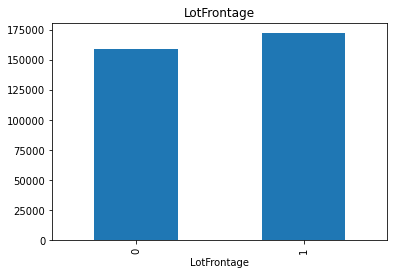

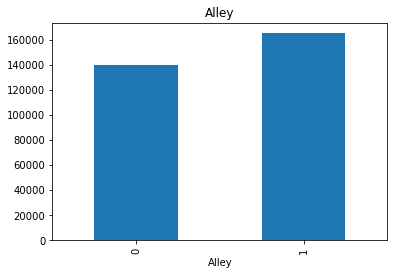

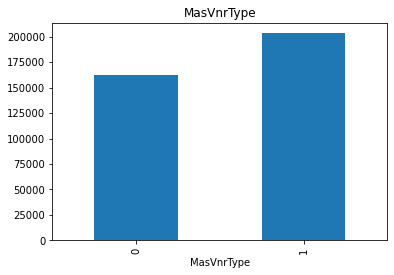

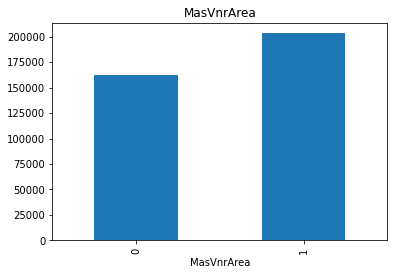

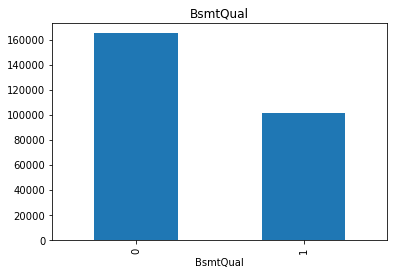

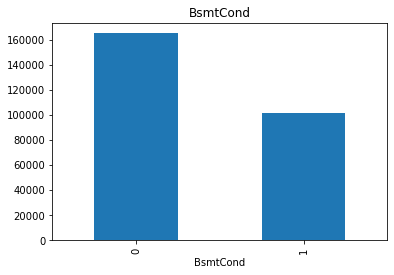

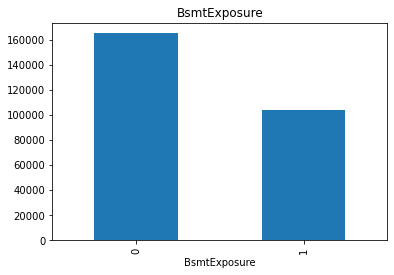

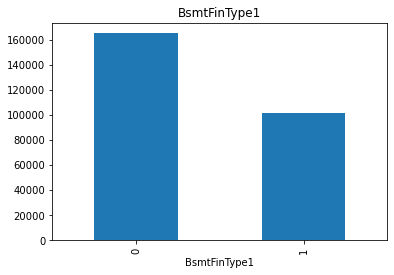

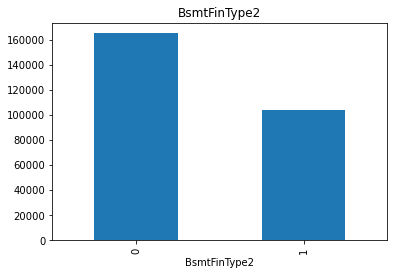

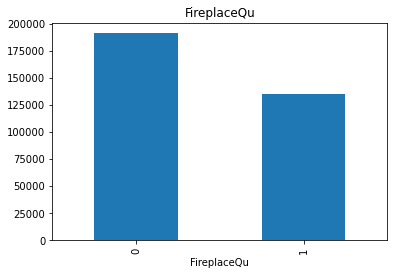

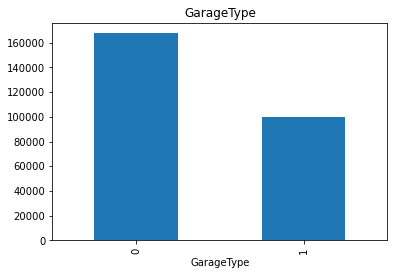

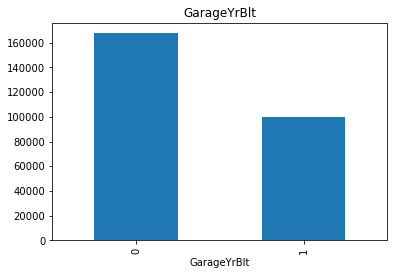

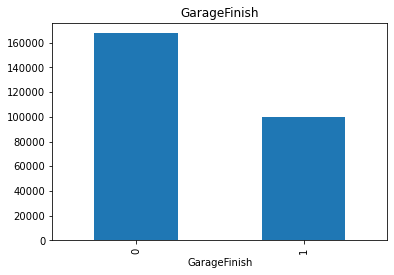

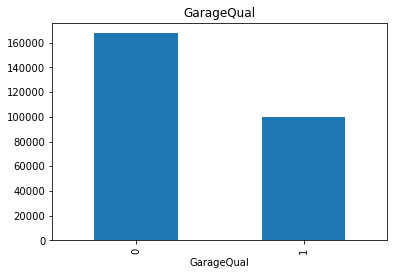

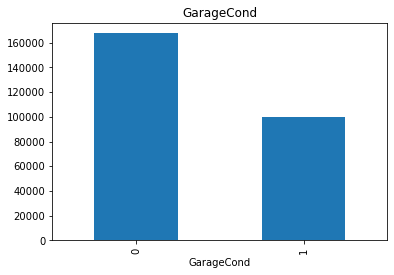

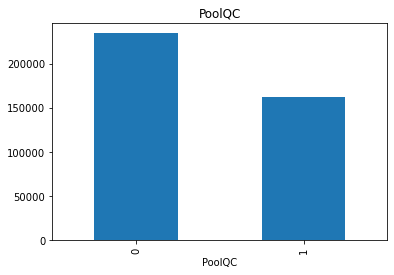

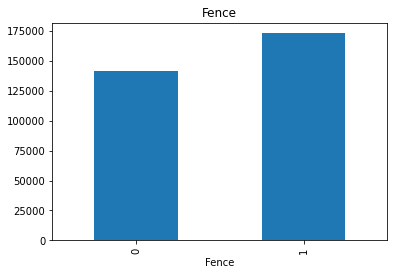

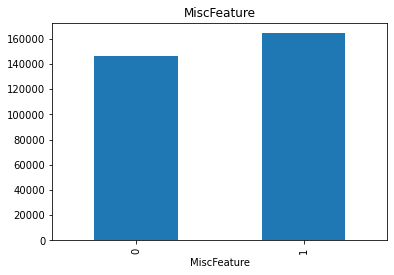

In [15]:
for feature in feature_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()
    

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

##### 

In [16]:
print("Id of Houeses" ,len(df.Id))

Id of Houeses 1460


## Numerical Variables

In [17]:
numerical_variable = [feature for feature in df.columns if df[feature].dtype != "O" ]
print("Number of Numerical " , len(numerical_variable))

Number of Numerical  38


In [18]:
df[numerical_variable].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
year_feature = [feature for feature in numerical_variable if "Yr" in feature or "Year" in feature]

In [20]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
for feature in year_feature:
    print(feature , df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

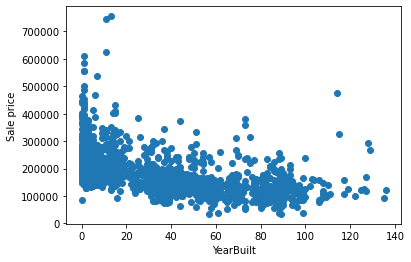

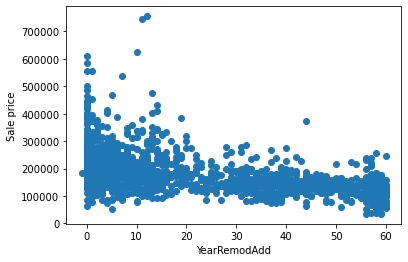

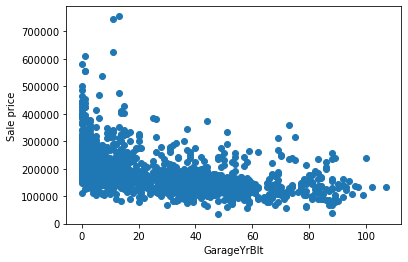

In [22]:
for feature in year_feature:
    if feature!= "YrSold":
        data = df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        df[feature] = df["YrSold"]-df[feature]
        
        plt.scatter(df[feature] , df["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sale price")
        plt.show()

In [23]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discreate_feature = [feature for feature in numerical_variable if len(df[feature].unique())<25 and feature not in year_feature+["Id"]]

In [24]:
print("Discreate Variable Count" , len(discreate_feature))

Discreate Variable Count 17


In [25]:
discreate_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [26]:
df[discreate_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


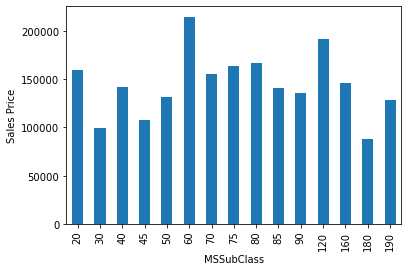

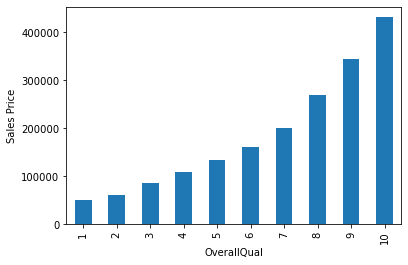

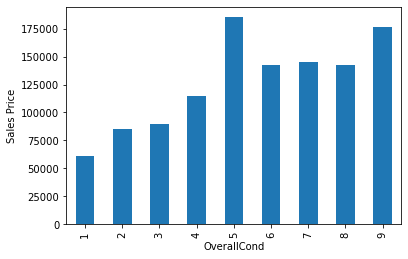

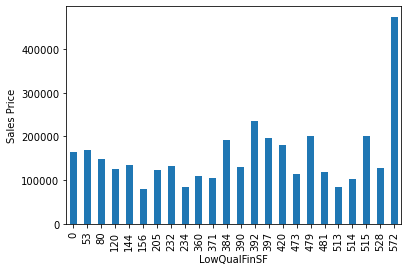

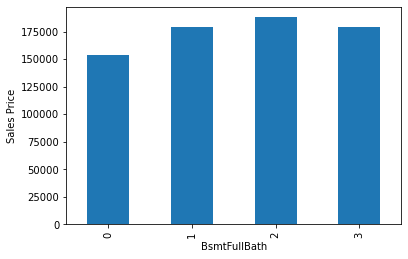

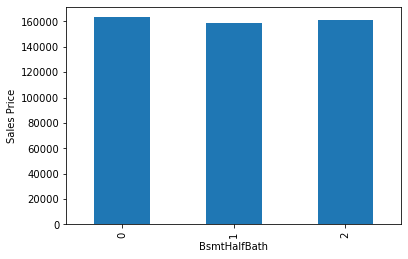

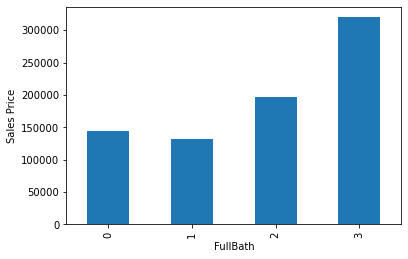

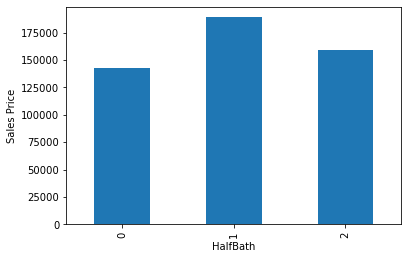

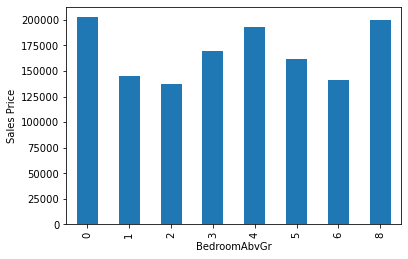

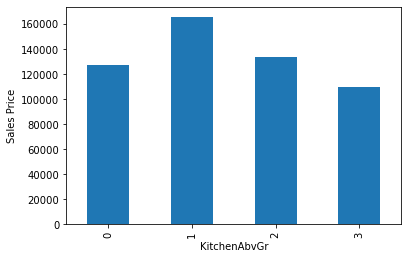

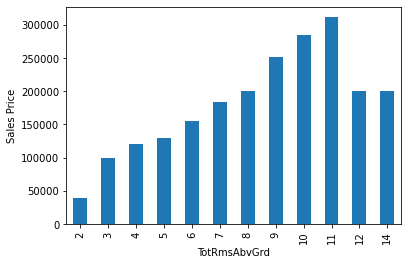

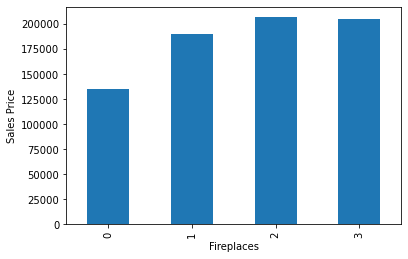

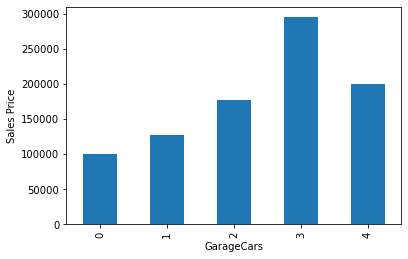

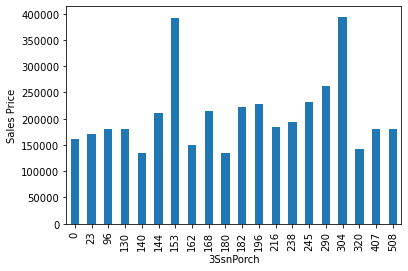

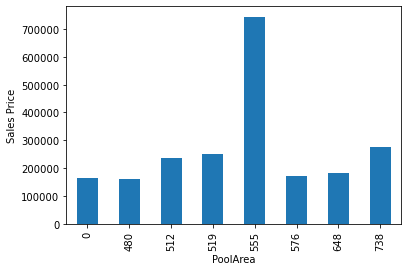

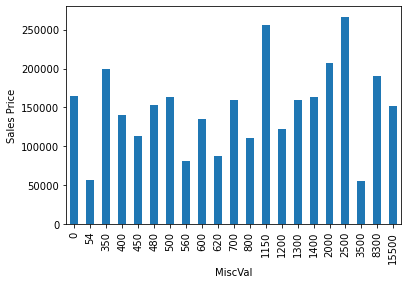

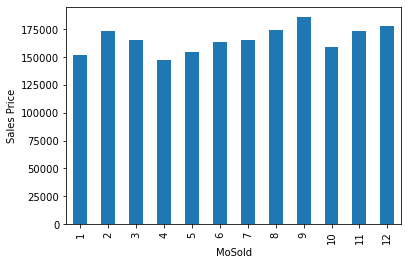

In [27]:
for feature in discreate_feature:
    data = df.copy()
    df.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.show(feature)

In [28]:
## There is a relationship between variable number and SalePrice

# continues_variable

In [29]:
continues_variable = [feature for feature in numerical_variable if feature not in discreate_feature+year_feature+["Id"]]

In [30]:
print("continues Variable Count", len(continues_variable))

continues Variable Count 16


In [31]:
continues_variable

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [32]:
df[continues_variable].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


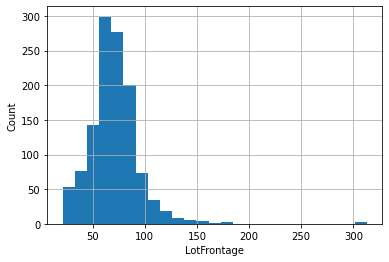

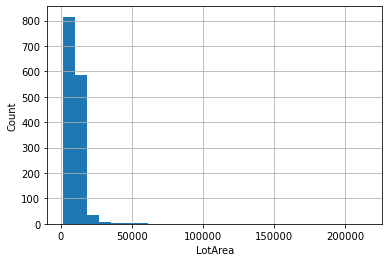

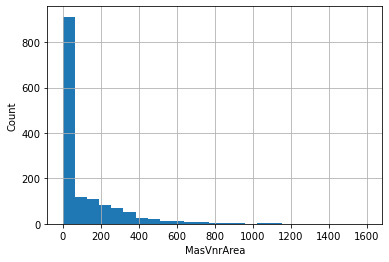

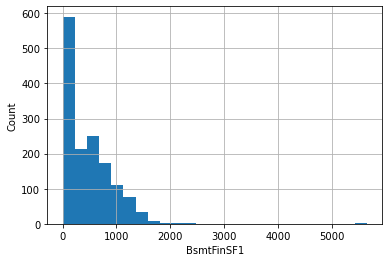

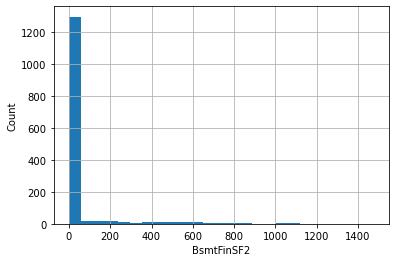

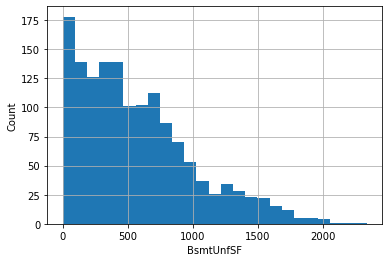

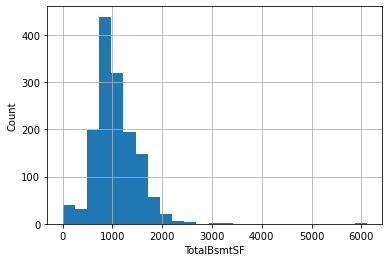

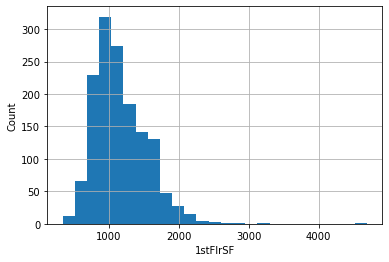

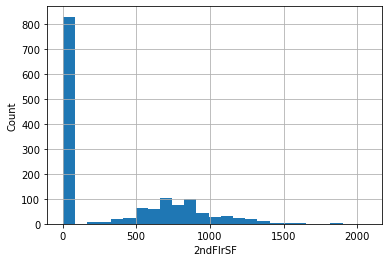

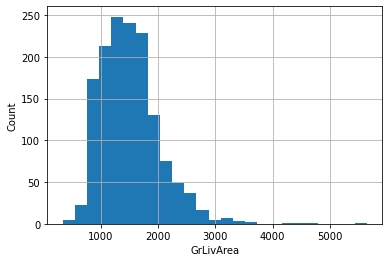

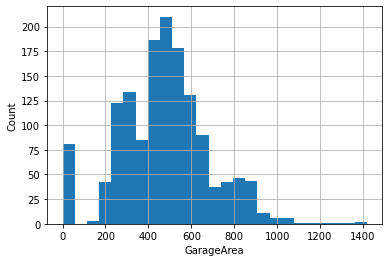

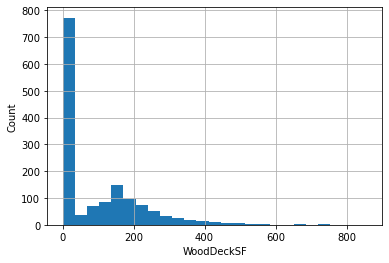

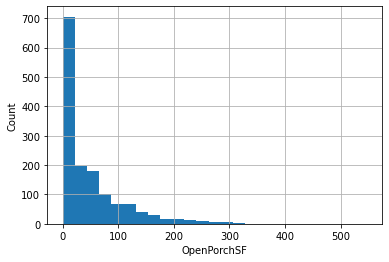

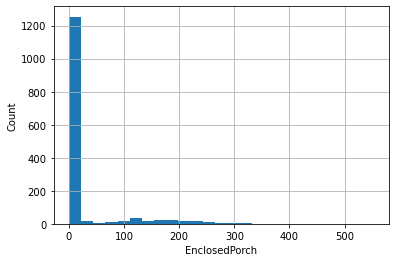

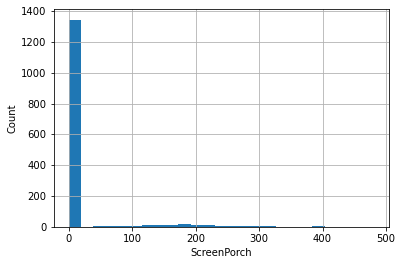

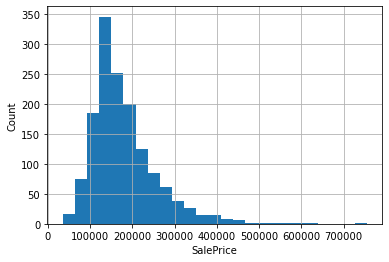

In [33]:
for feature in continues_variable:
    data = df.copy()
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show(feature)

# Exploratory Data Analysis Part 2 

In [34]:
#we will be using logarithmic transformation

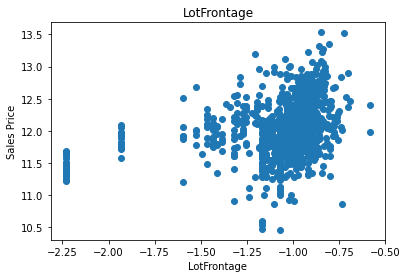

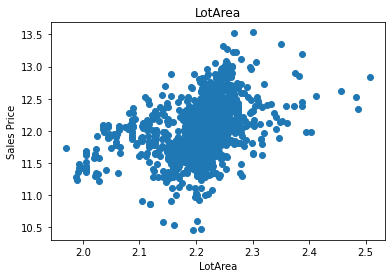

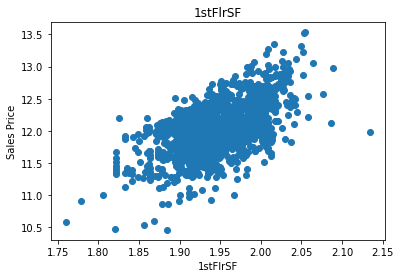

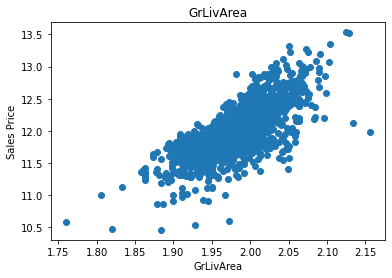

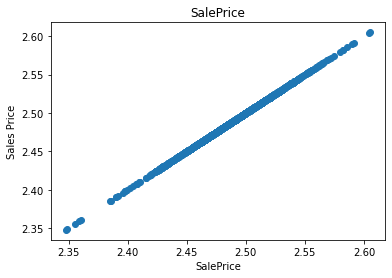

In [41]:
for feature in continues_variable:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["Saleprice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature] , data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("Sales Price")
        plt.title(feature)
        plt.show()

# Outliers

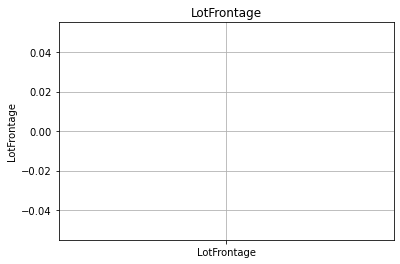

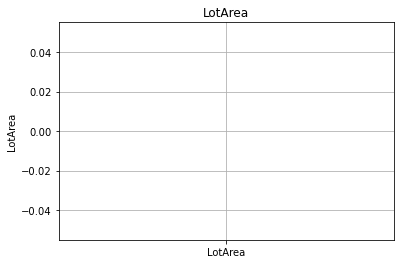

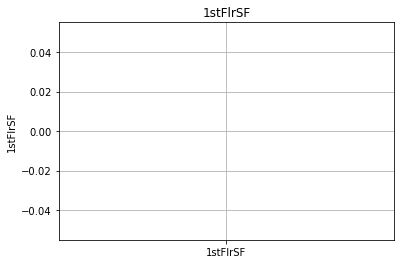

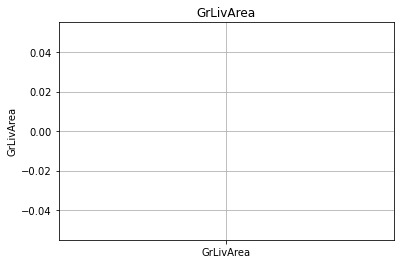

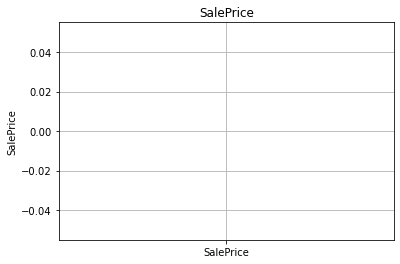

In [78]:
for feature in continues_variable:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

    

# categorical variable

In [67]:
categorical_features = [feature for feature in data.columns if data[feature].dtype =="O"]

In [68]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [69]:
data[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [65]:
data[numerical_variable]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,NaN,NaN,7,5,5,5,196.0,706,...,0,61,0,0,0,0,0,2,2008,NaN
1,2,20,NaN,NaN,6,8,31,31,0.0,978,...,298,0,0,0,0,0,0,5,2007,NaN
2,3,60,NaN,NaN,7,5,7,6,162.0,486,...,0,42,0,0,0,0,0,9,2008,NaN
3,4,70,NaN,NaN,7,5,91,36,0.0,216,...,0,35,272,0,0,0,0,2,2006,NaN
4,5,60,NaN,NaN,8,5,8,8,350.0,655,...,192,84,0,0,0,0,0,12,2008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,NaN,NaN,6,5,8,7,0.0,0,...,0,40,0,0,0,0,0,8,2007,NaN
1456,1457,20,NaN,NaN,6,6,32,22,119.0,790,...,349,0,0,0,0,0,0,2,2010,NaN
1457,1458,70,NaN,NaN,7,9,69,4,0.0,275,...,0,60,0,0,0,0,2500,5,2010,NaN
1458,1459,20,NaN,NaN,5,6,60,14,0.0,49,...,366,0,112,0,0,0,0,4,2010,NaN


In [66]:
data[discreate_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


In [71]:
for feature in categorical_features:
    print("the feature in {} and the number of categorical {}".format(feature, len(data[feature].unique())))

the feature in MSZoning and the number of categorical 5
the feature in Street and the number of categorical 2
the feature in Alley and the number of categorical 3
the feature in LotShape and the number of categorical 4
the feature in LandContour and the number of categorical 4
the feature in Utilities and the number of categorical 2
the feature in LotConfig and the number of categorical 5
the feature in LandSlope and the number of categorical 3
the feature in Neighborhood and the number of categorical 25
the feature in Condition1 and the number of categorical 9
the feature in Condition2 and the number of categorical 8
the feature in BldgType and the number of categorical 5
the feature in HouseStyle and the number of categorical 8
the feature in RoofStyle and the number of categorical 6
the feature in RoofMatl and the number of categorical 8
the feature in Exterior1st and the number of categorical 15
the feature in Exterior2nd and the number of categorical 16
the feature in MasVnrType a

#### here we will find out the relation between categorical variable and the dependent fetaure sales price

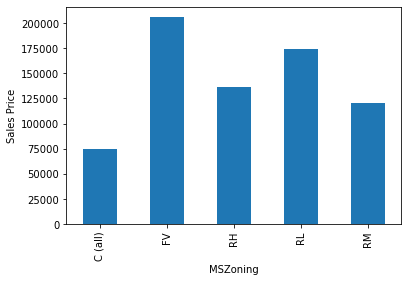

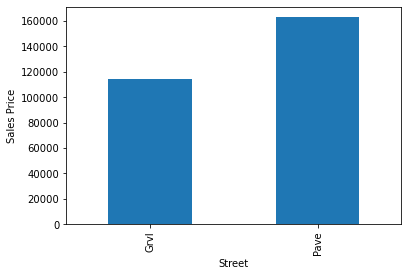

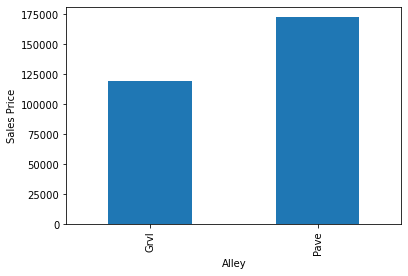

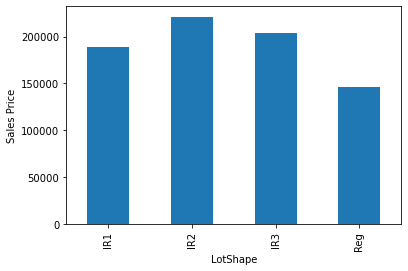

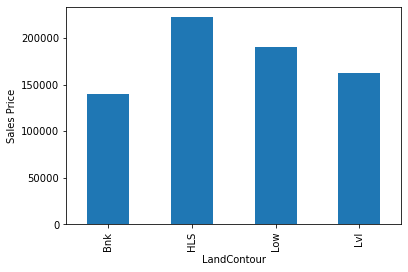

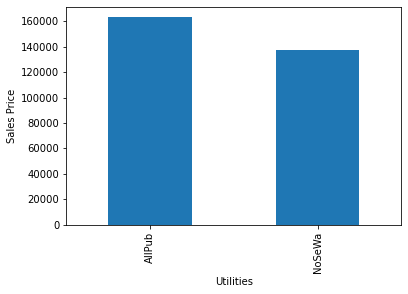

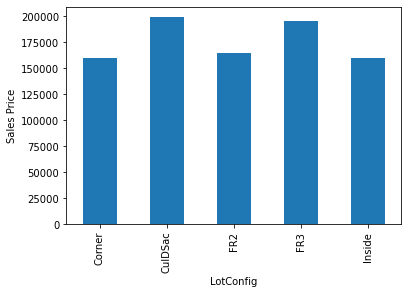

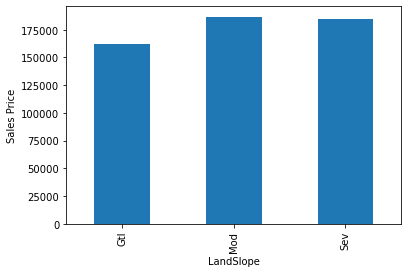

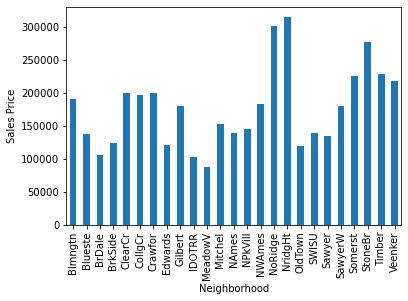

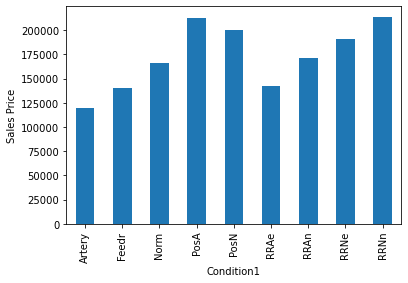

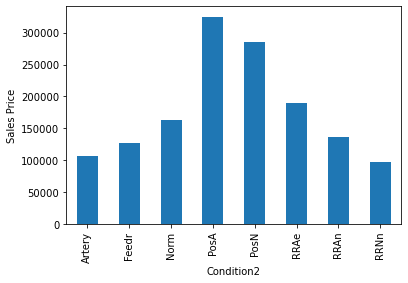

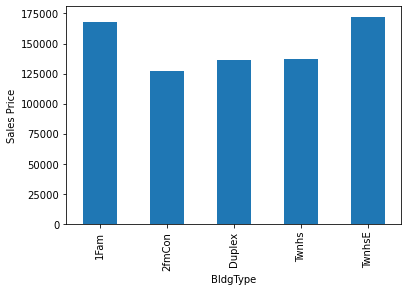

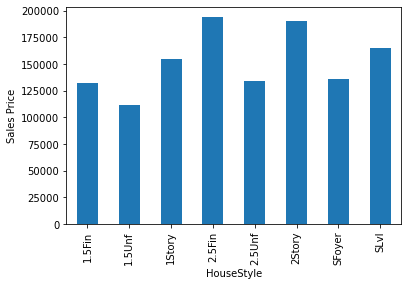

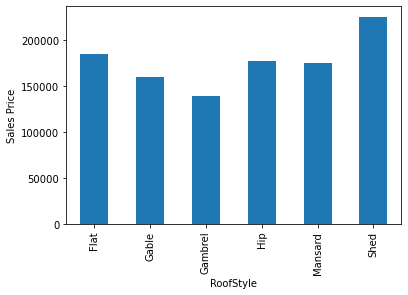

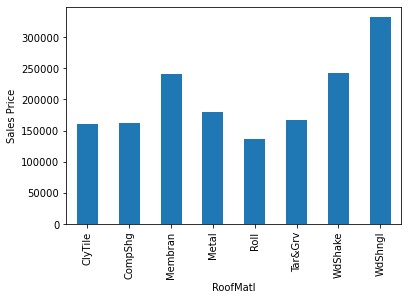

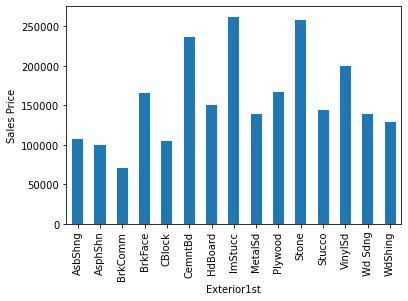

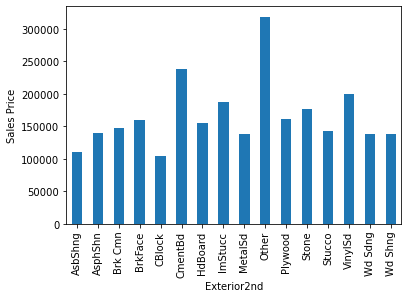

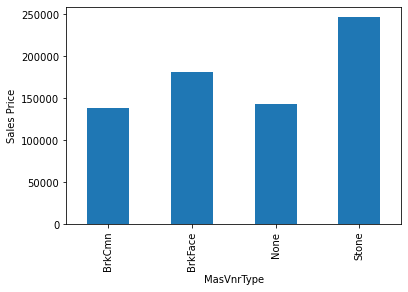

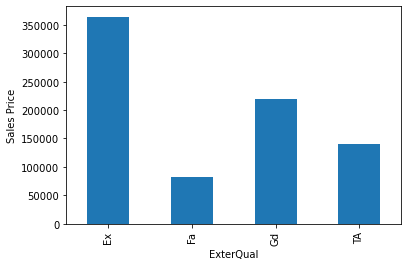

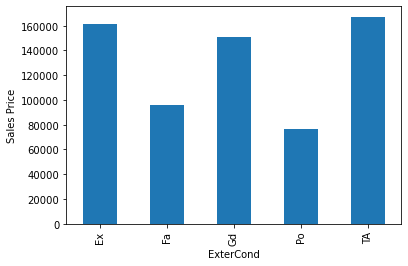

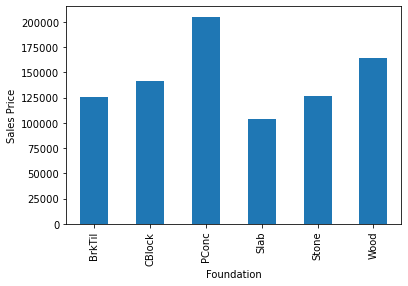

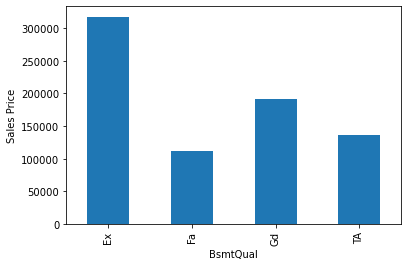

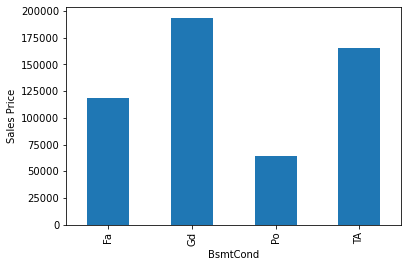

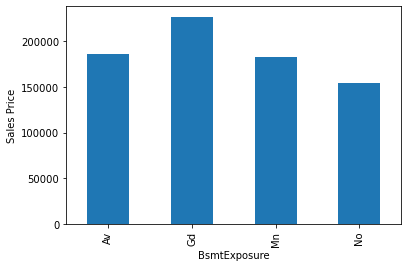

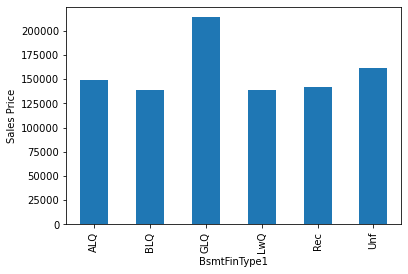

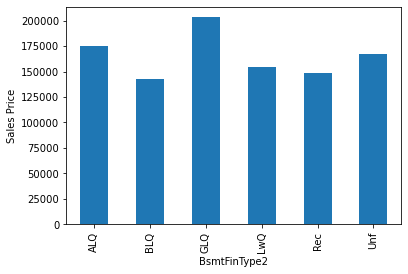

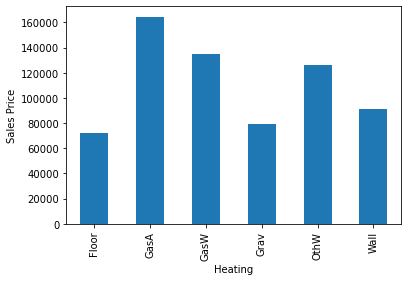

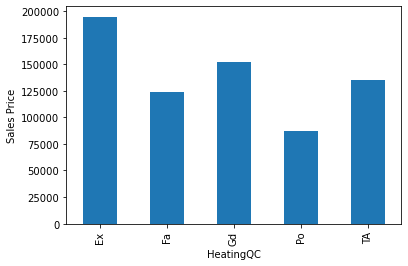

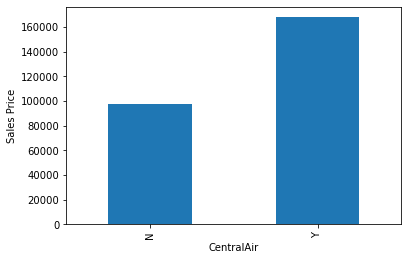

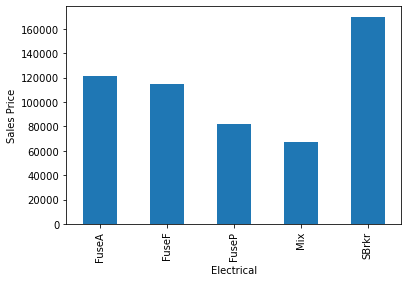

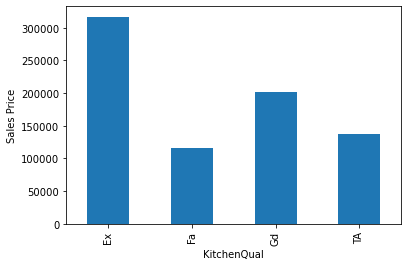

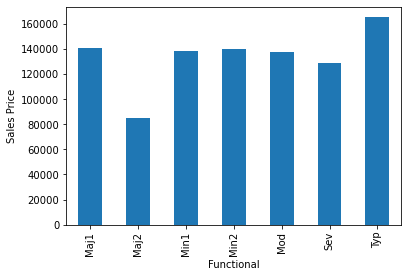

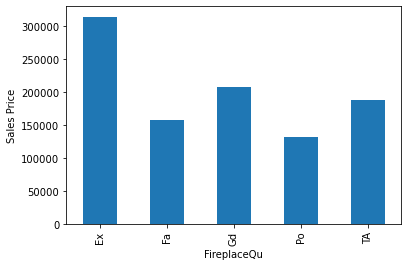

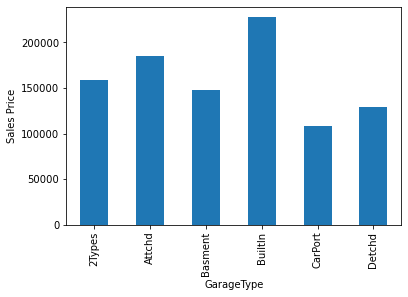

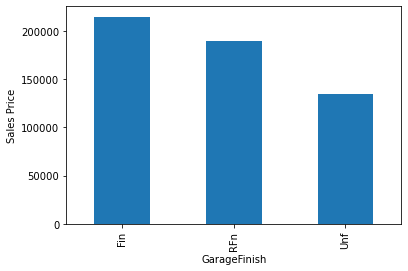

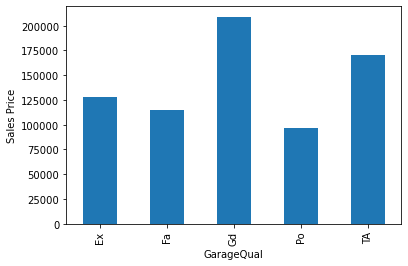

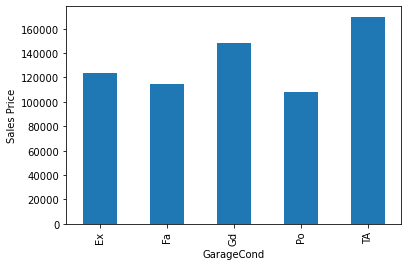

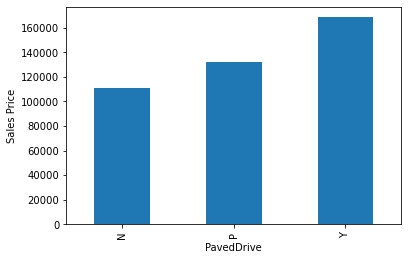

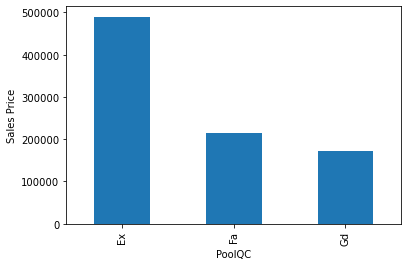

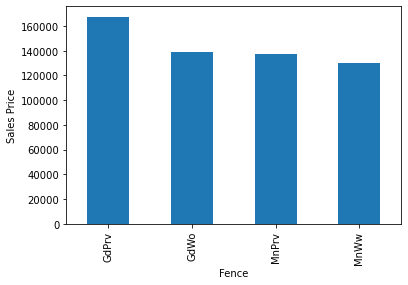

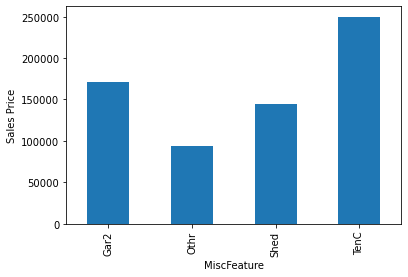

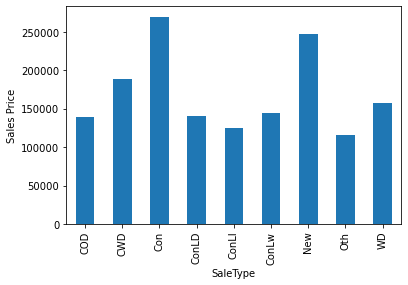

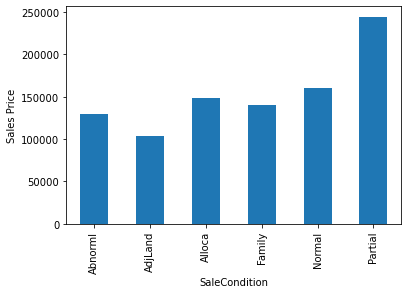

In [75]:
for feature in categorical_features:
    df.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.show()

## train test and split

In [84]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data, data["SalePrice"], test_size = 0.2)

In [85]:
len(x_train)

1168

In [86]:
len(x_test)

292